<a href="https://colab.research.google.com/github/Isam50/SQA_21S21443/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/BinaryClass/train'
test_dir = '/content/drive/MyDrive/BinaryClass/test'

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/BinaryClass/train/birds')))
print(len(os.listdir('/content/drive/MyDrive/BinaryClass/train/drones')))
print(len(os.listdir('/content/drive/MyDrive/BinaryClass/test/birds')))
print(len(os.listdir('/content/drive/MyDrive/BinaryClass/test/drones')))

165
165
34
34


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (birds vs. drones)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 262 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.layers import BatchNormalization # import BatchNormalization
from tensorflow.keras.layers import Dropout

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)


resnet_model.add(Flatten())

resnet_model.add(Dense(512,activation='relu')) #feature reduction


resnet_model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = resnet_model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
9/9 [==============================] - 91s 10s/step - loss: 3.9214 - accuracy: 0.5496 - val_loss: 3.7658 - val_accuracy: 0.5000
Epoch 2/5
9/9 [==============================] - 87s 10s/step - loss: 1.9690 - accuracy: 0.5420 - val_loss: 1.3027 - val_accuracy: 0.5156
Epoch 3/5
9/9 [==============================] - 84s 10s/step - loss: 1.1807 - accuracy: 0.5878 - val_loss: 0.9705 - val_accuracy: 0.5781
Epoch 4/5
9/9 [==============================] - 87s 10s/step - loss: 1.0256 - accuracy: 0.5954 - val_loss: 0.7860 - val_accuracy: 0.6250
Epoch 5/5
9/9 [==============================] - 89s 11s/step - loss: 0.7284 - accuracy: 0.6603 - val_loss: 0.6684 - val_accuracy: 0.6719


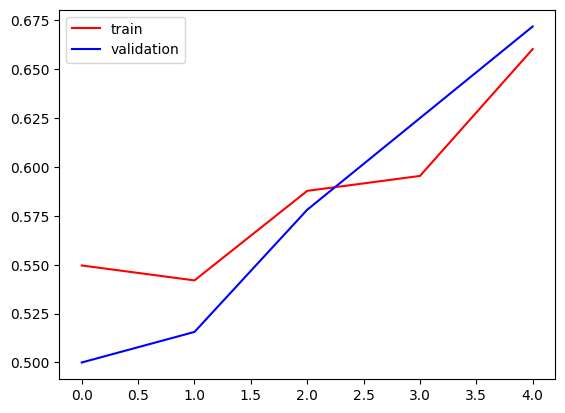

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

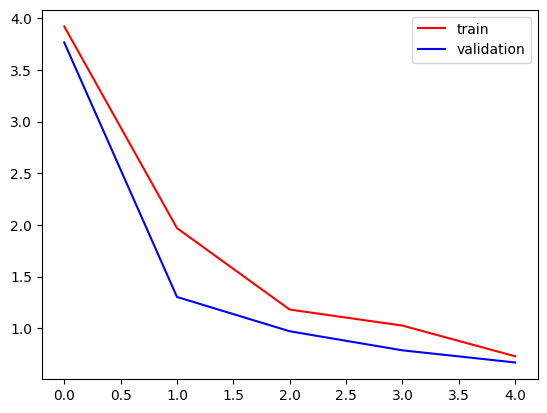

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 66 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

3/3 [==============================] - 19s 5s/step
[[0.13593727]
 [0.6601417 ]
 [0.28421056]
 [0.36201534]
 [0.7243863 ]
 [0.15874039]
 [0.10175688]
 [0.460797  ]
 [0.2926062 ]
 [0.62187886]
 [0.14470458]
 [0.74159247]
 [0.17739578]
 [0.1714714 ]
 [0.52960074]
 [0.08838927]
 [0.11389899]
 [0.52960074]
 [0.20378642]
 [0.59858847]
 [0.1519921 ]
 [0.58860475]
 [0.08836351]
 [0.556133  ]
 [0.22087806]
 [0.36553606]
 [0.44771796]
 [0.3566574 ]
 [0.12491164]
 [0.92474085]
 [0.11546526]
 [0.9569387 ]
 [0.1257272 ]
 [0.11317563]
 [0.15851195]
 [0.10798593]
 [0.86074364]
 [0.127553  ]
 [0.98555166]
 [0.15614825]
 [0.83827156]
 [0.06765337]
 [0.4739642 ]
 [0.08859744]
 [0.40863168]
 [0.560042  ]
 [0.15238571]
 [0.0780981 ]
 [0.13808148]
 [0.22302817]
 [0.21696682]
 [0.8727479 ]
 [0.164428  ]
 [0.88150513]
 [0.00292177]
 [0.31807506]
 [0.10880154]
 [0.17744225]
 [0.69297725]
 [0.41728583]
 [0.18881498]
 [0.13762203]
 [0.19649267]
 [0.12527432]
 [0.2962672 ]
 [0.96888214]]


In [ ]:
len(predictions)

66

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[22 11]
 [25  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.67      0.55        33
           1       0.42      0.24      0.31        33

    accuracy                           0.45        66
   macro avg       0.44      0.45      0.43        66
weighted avg       0.44      0.45      0.43        66

